In [22]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

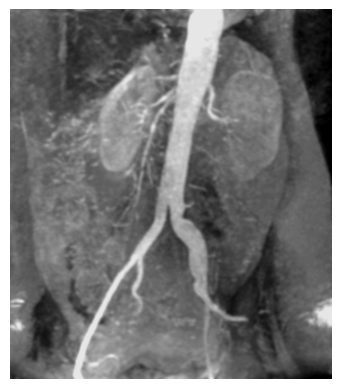

In [23]:
img = Image.open("../DIP3E_Original_Images_CH03/Fig0312(a)(kidney).tif")
img = np.asarray(img)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [24]:
h, w = img.shape
img1 = np.zeros((h, w),dtype = 'uint8')

min_range = 165
max_range = 255
range_val = 255
const_val = 45
X = []
y = []

for i in range(h):
    for j in range(w):
        if(img[i, j] >= min_range and img[i, j] <= max_range):
            img1[i, j] = range_val
            X.append(img[i, j])
            y.append(range_val)
            
        else:
            img1[i, j] = const_val
            X.append(img[i, j])
            y.append(const_val)

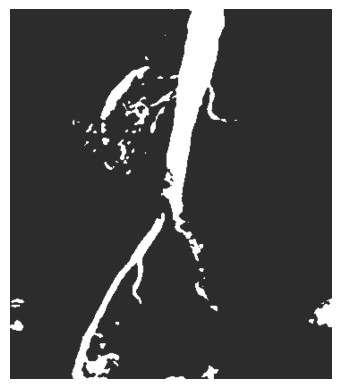

In [25]:
img1_arr = np.asarray(img1)

plt.imshow(img1_arr, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [26]:
img_pixel_df = pd.DataFrame(np.array([X, y])).T
img_pixel_df.columns = ['Old Pixel', 'New Pixel']
img_pixel_df.sort_values(by = 'Old Pixel', ascending = True, inplace = True)
img_pixel_df

,Old Pixel,New Pixel
596159,0,45
204464,0,45
204465,0,45
204466,0,45
204467,0,45
...,...,...
9057,230,255
9058,230,255
9059,230,255
58054,230,255


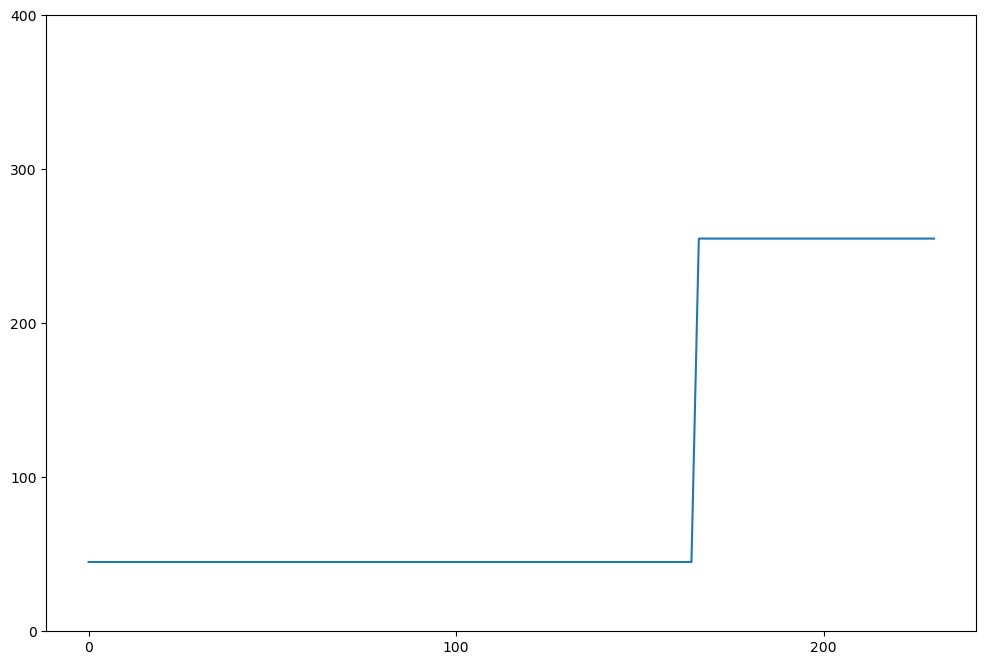

In [27]:
plt.figure(figsize = (12, 8))
plt.plot(img_pixel_df['Old Pixel'], img_pixel_df['New Pixel'])
plt.yticks(np.arange(0, 500, 100))
plt.xticks(np.arange(0, 300, 100));

In [28]:
img2 = np.zeros((h, w), dtype = 'uint8')

min_range = 140
max_range = 170
range_val = 225

X2 = []
y2 = []

for i in range(h):
    for j in range(w):
        if(img[i, j] >= min_range and img[i, j] <= max_range):
            img2[i, j] = range_val
            X2.append(img[i, j])
            y2.append(range_val)
        elif(img[i, j] < min_range or img[i, j] > max_range):
            img2[i, j] = img[i, j]
            X2.append(img[i, j])
            y2.append(img[i, j])

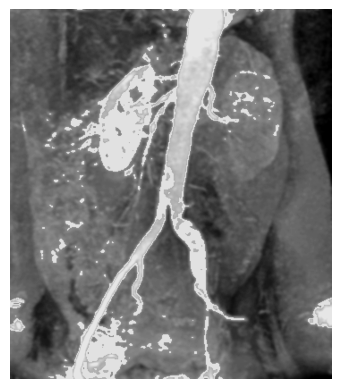

In [29]:
img2_arr = np.asarray(img2)

plt.imshow(img2_arr, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [30]:
img_pixel_df2 = pd.DataFrame(np.array([X2, y2])).T
img_pixel_df2.columns = ['Old Pixel', 'New Pixel']
img_pixel_df2.sort_values(by = ['Old Pixel'], ascending = True, inplace = True)
img_pixel_df2

,Old Pixel,New Pixel
596159,0,0
204464,0,0
204465,0,0
204466,0,0
204467,0,0
...,...,...
9057,230,230
9058,230,230
9059,230,230
58054,230,230


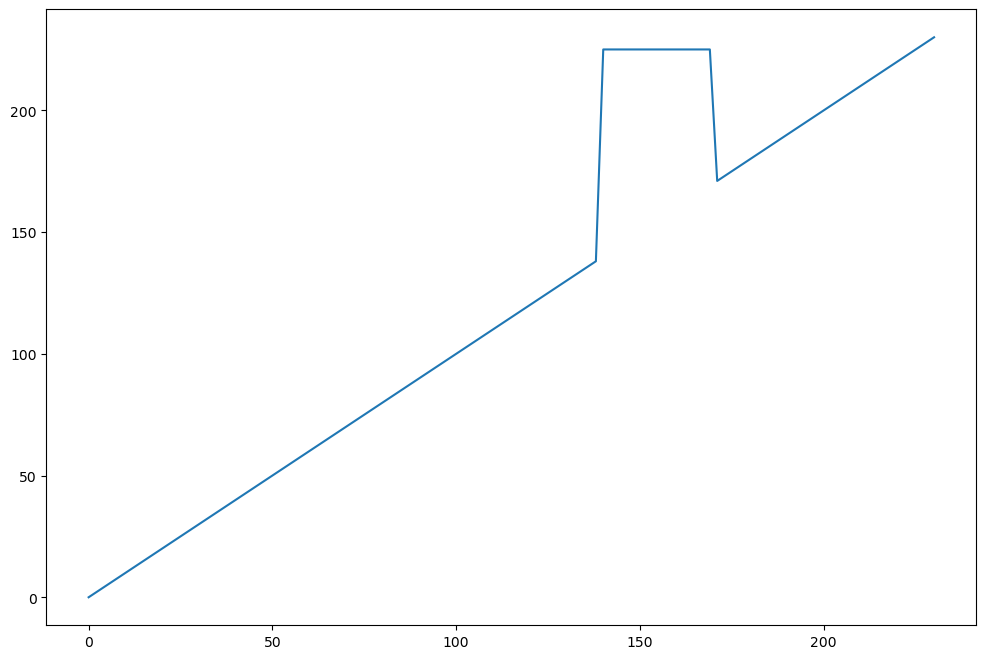

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(img_pixel_df2['Old Pixel'], img_pixel_df2['New Pixel'])

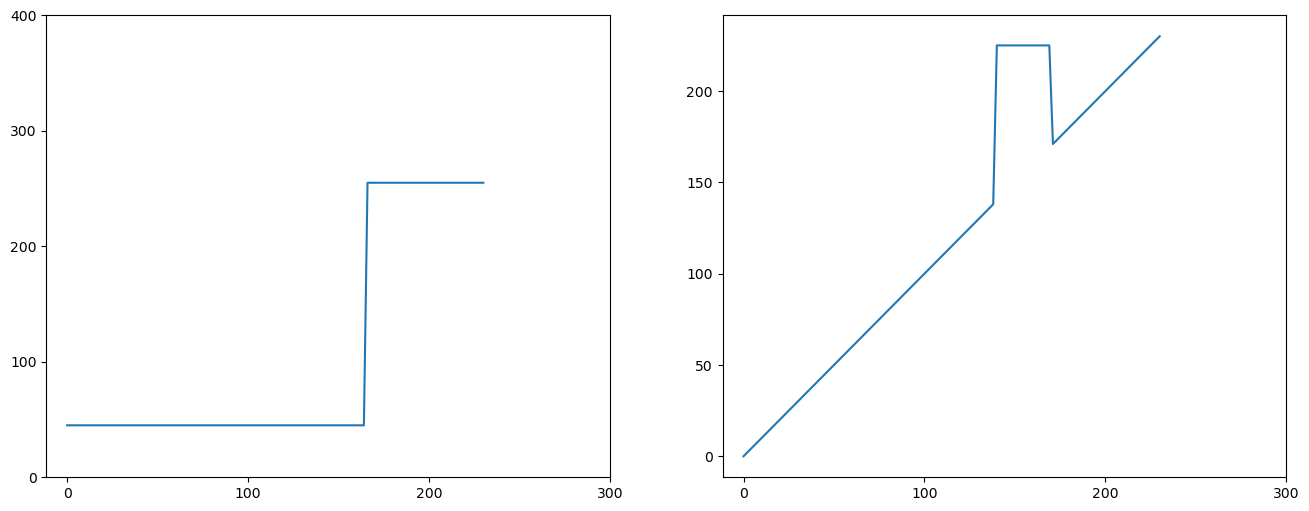

In [32]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
plt.plot(img_pixel_df['Old Pixel'], img_pixel_df['New Pixel'])
plt.yticks(np.arange(0, 500, 100))
plt.xticks(np.arange(0, 350, 100))

plt.subplot(122)
plt.plot(img_pixel_df2['Old Pixel'], img_pixel_df2['New Pixel'])
plt.xticks(np.arange(0, 350, 100))
plt.show();

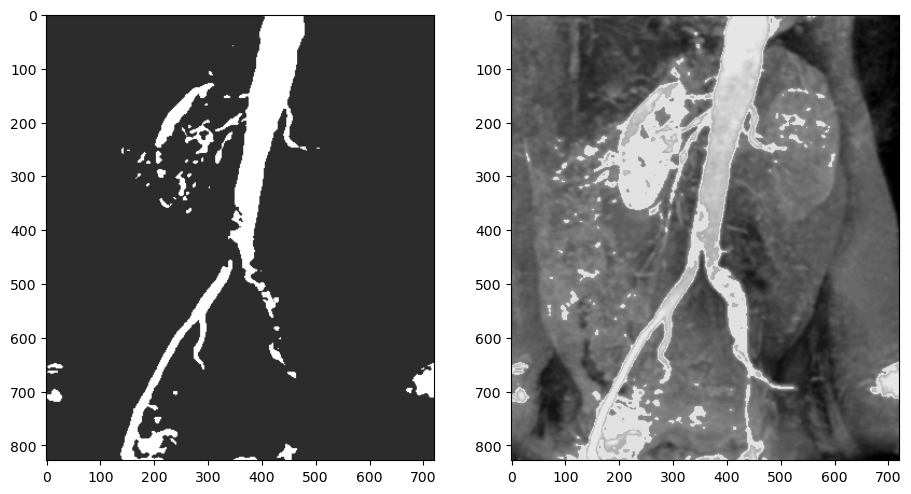

In [33]:
plt.figure(figsize = (11, 8))
plt.subplot(121)
img1_arr = np.asarray(img1)
plt.imshow(img1_arr, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(122)
img2_arr = np.asarray(img2)
plt.imshow(img2_arr, cmap = 'gray', vmin = 0, vmax = 255)
plt.show();